# <p style="text-align:center;" >  <span style="font-size:42px" > <span style='background:'> **Clustering - Customer Segmentation** </span> <span> <span>  </p> 


******************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Loading Dataset <span>  </div> <p>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
mall_df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


******************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Data Preprocessing <span>  </div> <p>

<span style="font-size:28px" ><mark> Knowing our dataset </mark> <span> 

In [3]:
mall_df.shape

(200, 5)

> <span style="font-size:18px" > We see the dataset has 200 rows and 5 columns <span>

In [4]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
from tabulate import tabulate

a = mall_df.select_dtypes(exclude='object')
b = mall_df.select_dtypes(include='object')

a_lst=list(a.columns)
b_lst=list(b.columns)

print(tabulate({'categorical':b_lst,'numerical':a_lst},headers = ['Categorical','Numerical']))

Categorical    Numerical
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


> <span style="font-size:18px" >We see there is one categorical columns, let us understand it better.<span>

In [7]:
mall_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
mall_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**********************

<span style="font-size:28px" ><mark>  Identifying and handling the missing values </mark> <span>

In [9]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

> <span style="font-size:18px" >There are no missing values.<span>

*****************

<span style="font-size:28px" ><mark>  Visual EDA  </mark> <span> 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

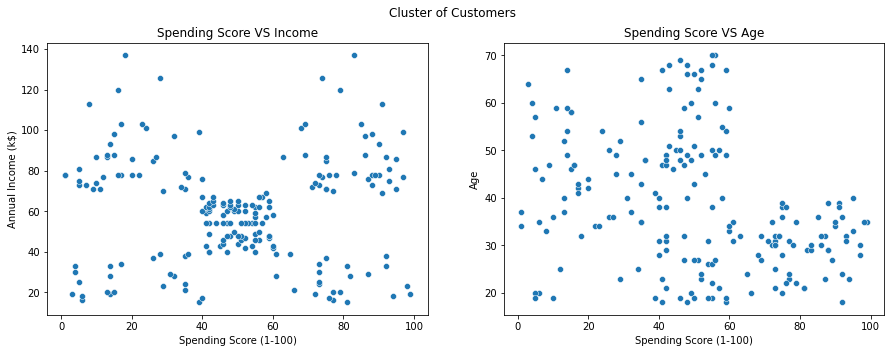

In [11]:
plt.figure(figsize=(15,5))

plt.suptitle('Cluster of Customers')
plt.subplot(121)
plt.title('Spending Score VS Income')
sb.scatterplot(x='Spending Score (1-100)',y ='Annual Income (k$)',data = mall_df)

plt.subplot(122)
plt.title('Spending Score VS Age')
sb.scatterplot(x='Spending Score (1-100)',y = 'Age',data = mall_df)
plt.show()


## Interpretation : 
    - We can see the relationship of Spending Score with Annual Income and Age of the customers.

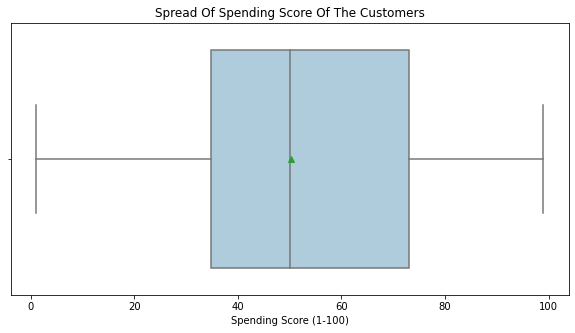

In [12]:
plt.figure(figsize=(10,5))
plt.title('Spread Of Spending Score Of The Customers')
sb.boxplot(x='Spending Score (1-100)',data = mall_df , showmeans = True ,palette = 'Paired')
plt.show()

> <span style="font-size:18px" >__We can see the average Spending Score is slightly over 50 while the median is 50.
The spending score ranges between 35 to 75.__ <span>

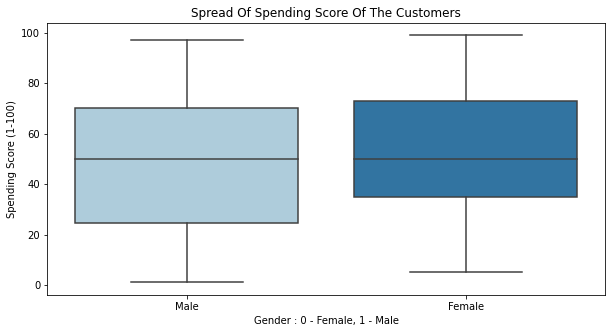

In [13]:
plt.figure(figsize=(10,5))
plt.title('Spread Of Spending Score Of The Customers')
sb.boxplot(x = 'Gender', y='Spending Score (1-100)', data = mall_df , palette = 'Paired' )
plt.xlabel('Gender : 0 - Female, 1 - Male')
plt.show()

> <span style="font-size:18px" > __We can see that the spread of Spending Score for Females is wider as compared to Males. However the average Spending Score seems to be the same for both Genders__ <span>

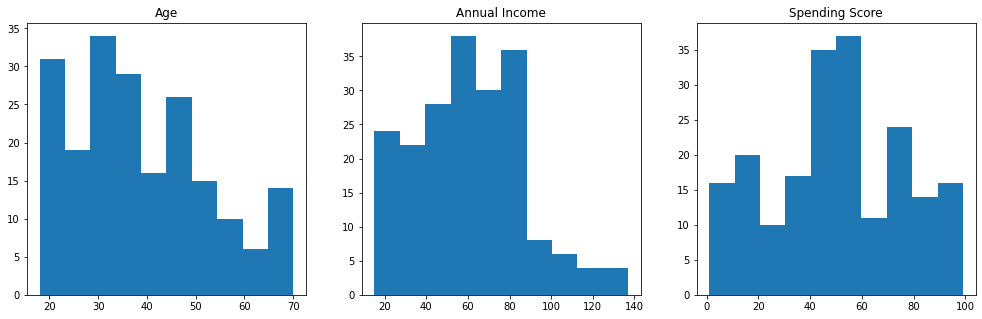

In [14]:
plt.figure(figsize=(17,5))

plt.subplot(131)
plt.title('Age')
plt.hist(mall_df.Age, bins = 10)

plt.subplot(132)
plt.title('Annual Income')
plt.hist(mall_df['Annual Income (k$)'], bins = 10)

plt.subplot(133)
plt.title('Spending Score')
plt.hist(mall_df['Spending Score (1-100)'], bins = 10)
plt.show()

> <span style="font-size:18px" > __Age : We can see that most customers are between the age of 20-50.__<span>

> <span style="font-size:18px" >__Annual Income : We can see that the majority customers earn between 10K - 85K per year.__

> <span style="font-size:18px" >__Spending Score : The graph looks like a normally distributed data. The average and the median spending score seems to be 50.__

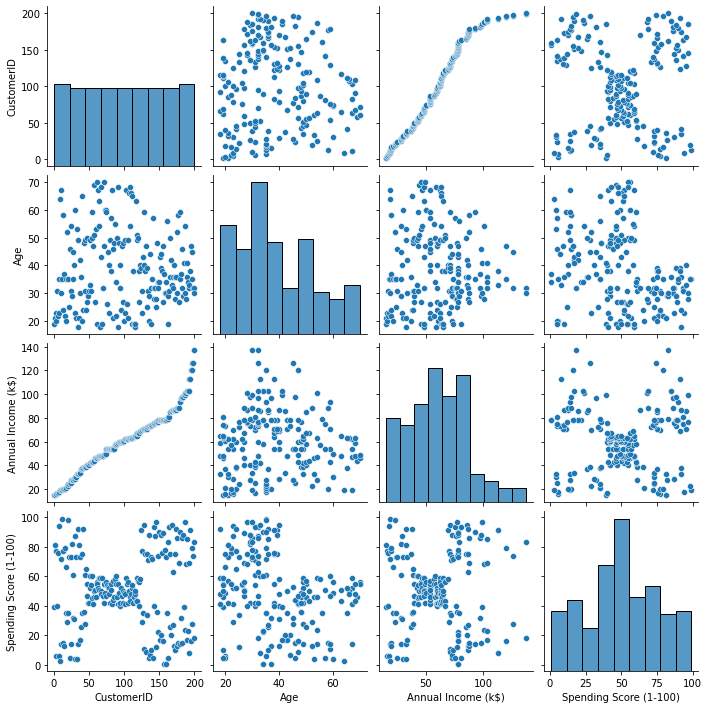

In [15]:
sb.pairplot(mall_df)

> <span style="font-size:18px" >__We can see some clusters in the some plots:
    - Customer ID vs Spending Score
    and Annual Income vs Spending Score__<span>

*******************************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Model Building <span>  </div> <p>

### Since this is a Clustering problem we will be trying different classification algorithms to see which model gives us the best results.

&#10148; K-Means </br>
&#10148; Hierarchical Clustering </br>
&#10148; DBSCAN </br>

### We will build our model, evaluate and compare the model to find the best fit algortihm for this dataset.

***************

<span style="font-size:28px" ><mark>  K Means Algorithm  </mark> <span> 

In [16]:
from sklearn.cluster import KMeans

In [17]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Filtering out the Customer ID and Gender column since it is not neccesary to build this model.

In [18]:
df = mall_df[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

### Elbow Curve to determine the k value

Text(0.5, 1.0, 'Elbow curve')

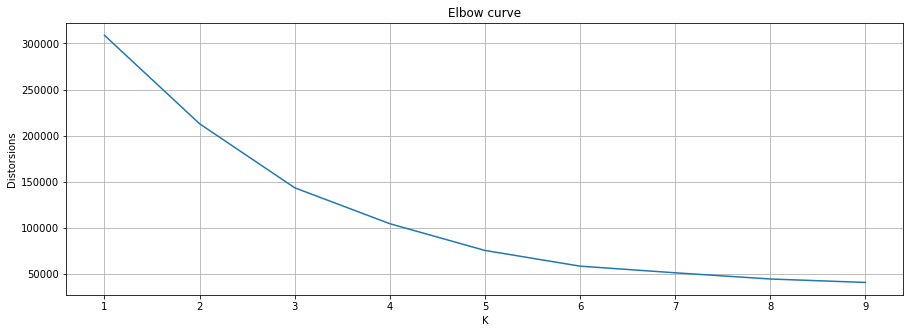

In [19]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k , random_state = 1)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')

> <span style="font-size:18px" > We can take our k as either 4 , 5 or 6 but let us also check the silhouetee score to get our k with the best score.

### Silhouetee score for k values

In [20]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [21]:
sil_range = range(3,10)
sil_score = []
for i in sil_range:
    labels = cluster.KMeans(n_clusters=i,random_state=1).fit(df).labels_
    score = metrics.silhouette_score(df,labels,random_state=1)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = ",i," is ",(metrics.silhouette_score(df,labels,random_state=1)))

Silhouette score for k(clusters) =  3  is  0.3839349967742105
Silhouette score for k(clusters) =  4  is  0.40546302077733304
Silhouette score for k(clusters) =  5  is  0.44428597560893024
Silhouette score for k(clusters) =  6  is  0.4523443947724053
Silhouette score for k(clusters) =  7  is  0.44125523526699084
Silhouette score for k(clusters) =  8  is  0.4280971079746162
Silhouette score for k(clusters) =  9  is  0.4137641526186506


> <span style="font-size:18px" > We can determine our k value as 6 as it has the best silhouetee score from the range.

### Building and fitting the model

In [22]:
kmmodel = KMeans(n_clusters=6 , random_state = 1).fit(df)
kmmodel

KMeans(n_clusters=6, random_state=1)

### Determining the centroid for the clusters

In [23]:
centroid = kmmodel.cluster_centers_
centroid

array([[27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429],
       [32.69230769, 86.53846154, 82.12820513],
       [56.15555556, 53.37777778, 49.08888889],
       [44.14285714, 25.14285714, 19.52380952],
       [25.27272727, 25.72727273, 79.36363636]])

### Predictions 

In [24]:
y = kmmodel.predict(df)
y 

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 3, 0,
       4, 5, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

### Visualising the clusters

Silhouette Coefficient: 0.4523443947724053


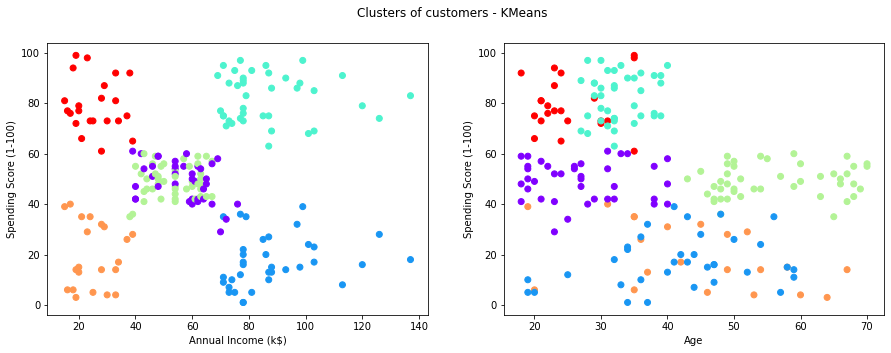

In [25]:
plt.figure(figsize=(15,5))

kmean_sil = metrics.silhouette_score(df,kmmodel.labels_)

plt.suptitle('Clusters of customers - KMeans')
print('Silhouette Coefficient:',kmean_sil)
plt.subplot(121)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c = kmmodel.labels_ ,cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(122)
plt.scatter(df['Age'],df['Spending Score (1-100)'], c = kmmodel.labels_ ,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Interpretation :
      - We can see 5 distinct clusters with a one overlapping cluster.
      - The inter cluster and intra cluster distance seems acceptable.

*********************

<span style="font-size:28px" ><mark>  Hierarchical Clustering  </mark> <span> 

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Dendogram to get the n_clusters

In [27]:
X = df.iloc[:, [0,1,2]].values

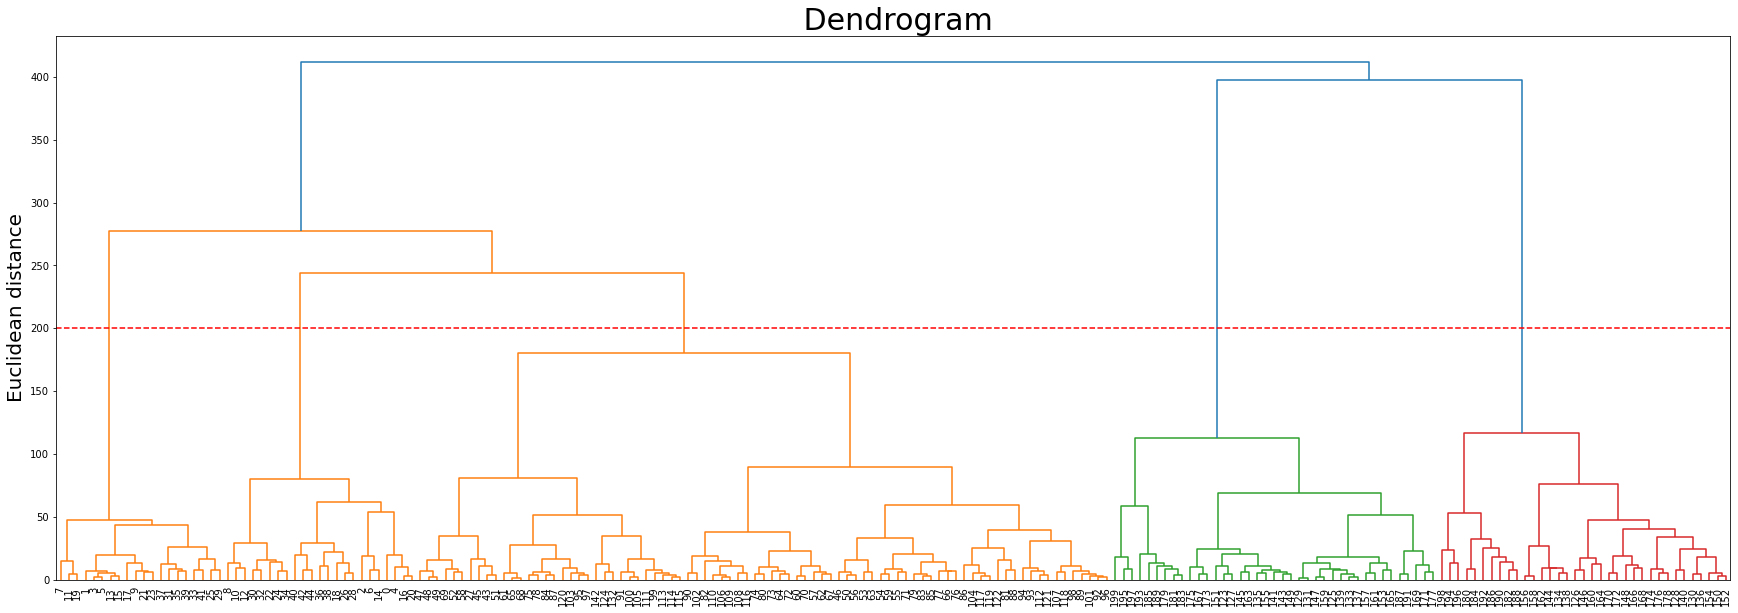

In [28]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

> <span style="font-size:18px" >We can see 5 clusters hence we will that to build our model

### Building and fitting the model

In [29]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=5)

> <span style="font-size:18px" > Different linkage methods were tried and all except for single linkage showed similar clusters. Single linkage was not clear. Ward linakge was our best option.

### Predictions

In [30]:
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

### Visualization

Silhouette Coefficient: 0.4401889024290193


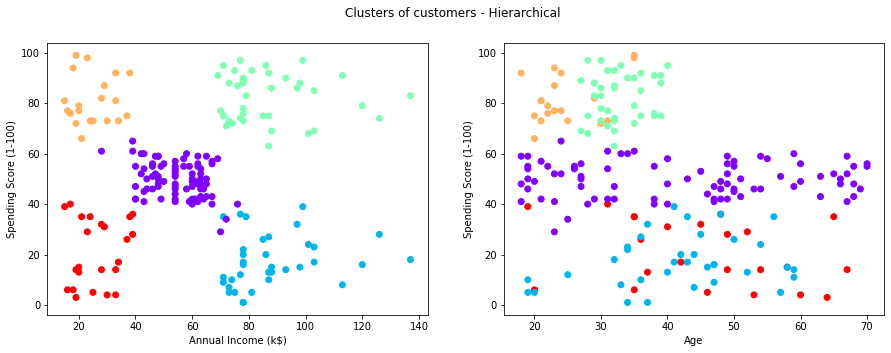

In [31]:
plt.figure(figsize=(15,5))

hc_sil = metrics.silhouette_score(df,hc.labels_)

print('Silhouette Coefficient:',hc_sil)
plt.suptitle('Clusters of customers - Hierarchical')
plt.subplot(121)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c = hc.labels_ ,cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(122)
plt.scatter(df['Age'],df['Spending Score (1-100)'], c = hc.labels_ ,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Interpretation :
    - We can see 5 distinct clusters with no over lapping.
    - The inter and intra cluster space seem appropriate as no data point is spilling into another cluster.

************************

<span style="font-size:28px" ><mark>  DBSCAN  </mark> <span> 

In [32]:
from sklearn.cluster import DBSCAN

### Determining the NearestNeighbors needed to create a cluster

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

> <span style="font-size:18px" > A range of n_neighbors were tried and 5 gave us decent clusters.

### K distance graph to determine our Epsilon

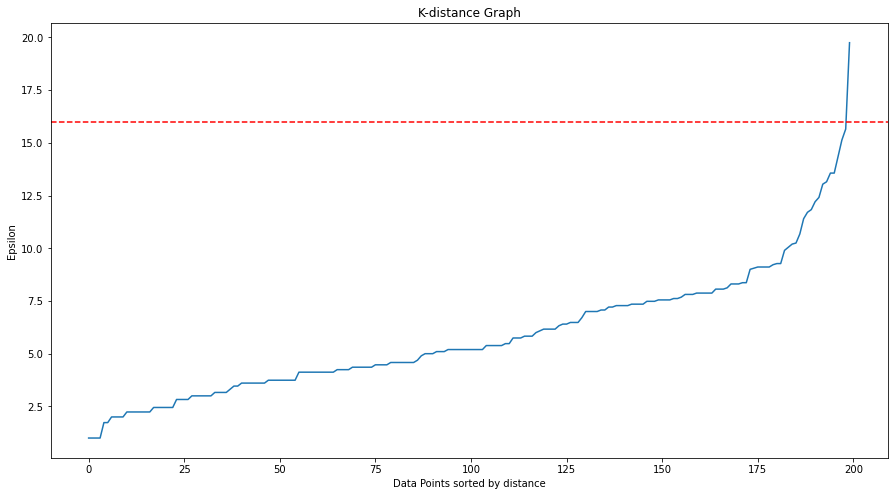

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=16, color='r', linestyle='--')
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

### Determining min_samples

In [35]:
eps= 16.5
for min_samples in range(1,21):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('| min_samples= ', min_samples, '|clusters: ', len(results))

| min_samples=  1 |clusters:  3
| min_samples=  2 |clusters:  3
| min_samples=  3 |clusters:  2
| min_samples=  4 |clusters:  2
| min_samples=  5 |clusters:  2
| min_samples=  6 |clusters:  2
| min_samples=  7 |clusters:  2
| min_samples=  8 |clusters:  2
| min_samples=  9 |clusters:  2
| min_samples=  10 |clusters:  2
| min_samples=  11 |clusters:  3
| min_samples=  12 |clusters:  3
| min_samples=  13 |clusters:  3
| min_samples=  14 |clusters:  3
| min_samples=  15 |clusters:  3
| min_samples=  16 |clusters:  4
| min_samples=  17 |clusters:  3
| min_samples=  18 |clusters:  3
| min_samples=  19 |clusters:  3
| min_samples=  20 |clusters:  3


### Building and fitting our model

In [36]:
dbscan = DBSCAN(eps,min_samples=16)
dbscan.fit(df)

DBSCAN(eps=16.5, min_samples=16)

### Count of label Predictions

In [37]:
df['DBSCAN_labels']= dbscan.labels_
df['DBSCAN_labels'].value_counts()

/var/folders/s5/fs8wsfxx4tndrhq92pr2nzq80000gn/T/ipykernel_17944/2204333162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_labels']= dbscan.labels_


 1    88
-1    62
 2    32
 0    18
Name: DBSCAN_labels, dtype: int64

> <span style="font-size:18px" >  As I increase my min_sample the outliers also increase therefore we are setting our min_sample at 4 to give us decent clustes with fewer outliers.

### Visualization

Silhouette Coefficient: 0.28352940249272246


Text(0, 0.5, 'Spending Score (1-100)')

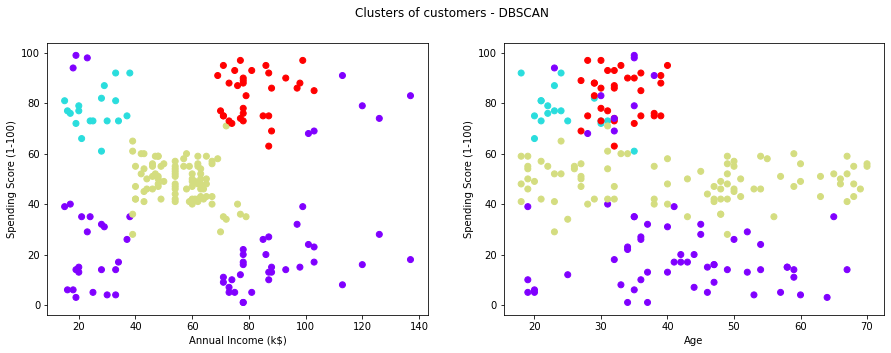

In [38]:
plt.figure(figsize=(15,5))

db_sil = metrics.silhouette_score(df,dbscan.labels_)

print('Silhouette Coefficient:',db_sil)

plt.suptitle('Clusters of customers - DBSCAN')

plt.subplot(121)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c = dbscan.labels_ ,cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(122)
plt.scatter(df['Age'],df['Spending Score (1-100)'], c = dbscan.labels_ ,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

## Interpretation :
    - We can see 3 distinct cluster but with a lot of overlapping and 1 cluster more like outliers than clusters. 
    - Intra distance between clusters is very wide.

********************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Comprison of models<span>  </div> <p>

In [39]:
Sil_Score = pd.DataFrame()
Sil_Score['KMeans'] = [kmean_sil]
Sil_Score['Hierarchical'] = hc_sil 
Sil_Score['DBSCAN'] = db_sil
Sil_Score

,KMeans,Hierarchical,DBSCAN
0,0.452344,0.440189,0.283529


### After Comparing the Silhouette Score we do see the  K means and Hierarchical have a better Silhouette Score.
### But looking at the clusters Hierarchical gives us the clear and distinct clusters

# Hierarchical Clustering gives me the best distinct and more informative clusters of all three algortihms.


In [40]:
mall_df['Cluster'] = y_hc

In [41]:
cluster_df = mall_df.groupby(['Cluster'],as_index=False).mean()

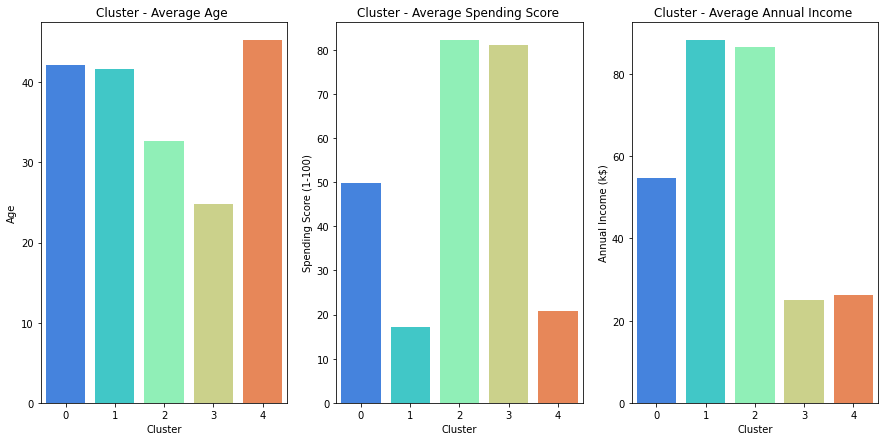

In [42]:
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.title('Cluster - Average Age ')
sb.barplot(x='Cluster',y='Age',data=cluster_df,palette='rainbow')
plt.subplot(132)
plt.title('Cluster - Average Spending Score ')
sb.barplot(x='Cluster',y='Spending Score (1-100)',data=cluster_df,palette='rainbow')
plt.subplot(133)
plt.title('Cluster - Average Annual Income ')
sb.barplot(x='Cluster',y='Annual Income (k$)',data=cluster_df,palette='rainbow')
plt.show()

In [43]:
gender_df = pd.DataFrame(mall_df.groupby(['Cluster','Gender'])['Gender'].count())
gender_df

Gender
Cluster Gender        
0       Female      50
        Male        33
1       Female      15
        Male        20
2       Female      21
        Male        18
3       Female      12
        Male         8
4       Female      14
        Male         9

    - Age : The cluster with the oldest average age is cluster 4 and the youngest crowd belongs to cluster 2.

    - Spending Score : The highest spending Score is highest in cluster 2 followed by 3 and lowest in cluster 1.

    - Annual Income : The Highest average income is highest in cluster 1 and lowest in cluster 3.

    - Customer Count : Cluster 0 has the most customers while the cluster 3 has the least count of customers.


## Let us understand the the clusters in detail to get required inferences from it to help make business decisions.

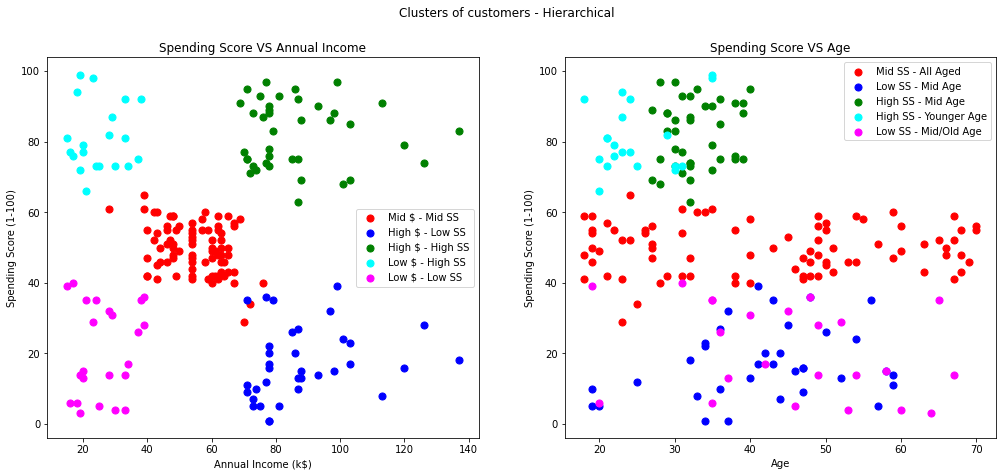

In [44]:
plt.figure(figsize=(17,7))
plt.suptitle('Clusters of customers - Hierarchical')

plt.subplot(121)
X = df.iloc[:, [1, 2]].values
c = ['red','blue','g','cyan','magenta']
label = ['Mid $ - Mid SS','High $ - Low SS','High $ - High SS','Low $ - High SS','Low $ - Low SS']

for i in range(5):
    plt.scatter(X[y_hc == [i], 0], X[y_hc == [i], 1], s = 50, c = c[i], label = label[i])
    plt.title('Spending Score VS Annual Income')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    
plt.subplot(122)
X1 = df.iloc[:, [0, 2]].values
c = ['r','blue','g','cyan','magenta']
label = ['Mid SS - All Aged','Low SS - Mid Age ','High SS - Mid Age','High SS - Younger Age','Low SS - Mid/Old Age']

for i in range(5):
    plt.scatter(X1[y_hc == [i], 0], X1[y_hc == [i], 1], s = 50, c = c[i], label = label[i])
    plt.title('Spending Score VS Age')
    plt.xlabel('Age')
    plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()


## We have labeled our cluster accordingly and these are my suggestions:

    - We need to focus more on the red cluster that represent the mid income and mid spending score that range accross all ages and the green cluster representing the high income high spenidng score and relatively younger batch of people.
    
    - As they are our more profitable clients and we need strategies to retain them.
    
    - We also need to induce a strategy to attract the blue cluster i.e the customers with high income and low spending score to spend more.
    
    - We can also offer some attractive strategies like back to school or some discounts for the the cyan cluster as they are younger crowd with low income but higher spending score which could be for various reasons.
    
